# Recognizing Handwritten Digits on MNIST Dataset using KNN

# Step 1. Import required Packages 

In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Step 2.Data Preparation

In [34]:
df_train = pd.read_csv('mnist_train.csv')
df_test = pd.read_csv('mnist_test.csv')
print(df_train.shape)
print(df_test.shape)

(59999, 785)
(9999, 785)


In [35]:
df_train.head(5)

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df_test.head(5)

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
data1 = df_train.values
data2 = df_test.values

X_train = data1[:,1:]
Y_train = data1[:,0]

X_test = data2[:,1:]
Y_test = data2[:,0]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(59999, 784) (59999,)
(9999, 784) (9999,)


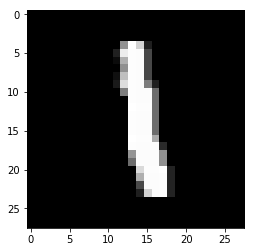

1


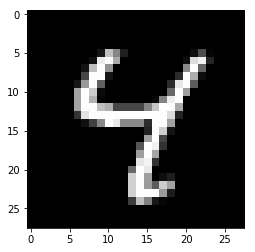

4


In [38]:
#Visualise Some Samples

def imgshow(sample):
    
    d = sample.reshape((28,28))
    plt.imshow(d,cmap='gray')
    plt.show()
    
imgshow(X_train[5])
print(Y_train[5])

imgshow(X_test[5])
print(Y_test[5])

# Step 3. K-NN

In [39]:
def dist(x1,x2):
    return np.sqrt(((x1-x2)**2).sum())

def knn(x_train,query_point,y_train,k=5):
    
    vals = []
    
    for x in range(x_train.shape[0]):
        
        arr = [dist(query_point,x_train[x,:]),y_train[x]]
        vals.append(arr)
        
    vals = sorted(vals)
    
    #pick up first k values
    vals = np.array(vals[:k])
    pred_vals = np.unique(vals[:,1],return_counts = True)
    
    #pick value with largest occurence
    index = pred_vals[1].argmax()
    
    return pred_vals[0][index]

# Step 4. Make Predictions

In [40]:
def predict(X_train,Y_train,X_test):
    
    all_pred = []
    
    for x in X_test:
        
        pred = knn(X_train,x,Y_train)
        all_pred.append(pred)
    
    
    all_pred = np.array(all_pred,dtype='int32')
    
    return all_pred
    

In [51]:
pred = predict(X_train,Y_train,X_test)
accuracy = np.sum(pred == Y_test)/Y_test.shape[0]


Accuracy is : 0.969


In [56]:
print("Accuracy is : %.3f"%(accuracy*100))
print("Score is : %.3f"%accuracy)

Accuracy is : 96.880
Score is : 0.969
